In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder,LabelEncoder



In [3]:
data_path="house_price_regression_dataset.csv"

In [5]:
df=pd.read_csv(data_path)

In [7]:
def data(df):
  print(df.head())
  print("*"*50)
  print(df.shape)
  print("*"*50)
  print(df.info())
  print("*"*50)
  print(df.describe)
  print("*"*50)
  print(df.isnull().sum())
  print("*"*50)
  print(df.duplicated().sum())
  

In [9]:
    data(df=df)

   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  
**************************************************
(1000, 8)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-N

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


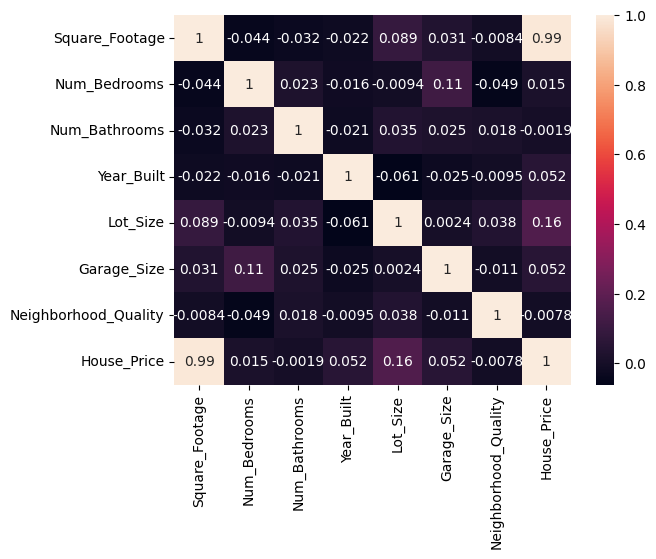

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
X=df.drop("House_Price",axis=1)
y=df["House_Price"]

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.corr()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
Square_Footage,1.000000,-0.031329,-0.040400,-0.025313,0.123264,0.048743,-0.009971
Num_Bedrooms,-0.031329,1.000000,0.045611,-0.021218,-0.013992,0.125973,-0.030534
Num_Bathrooms,-0.040400,0.045611,1.000000,-0.002155,0.039341,0.026809,0.042978
Year_Built,-0.025313,-0.021218,-0.002155,1.000000,-0.044403,-0.051596,-0.004570
Lot_Size,0.123264,-0.013992,0.039341,-0.044403,1.000000,-0.007773,0.037340
Garage_Size,0.048743,0.125973,0.026809,-0.051596,-0.007773,1.000000,0.008815
Neighborhood_Quality,-0.009971,-0.030534,0.042978,-0.004570,0.037340,0.008815,1.000000


In [21]:
def corelletion_drop(df,threshold):
  corr=df.corr()
  liste=[]
  for i in range(len(corr.columns)):
    for j in range(i):
      if abs(corr.iloc[i,j])>threshold:
         liste.append(corr.columns[i])
  return liste

In [23]:
corelletion_drop(X_train,threshold=0.60)

[]

In [25]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [27]:
X_train_scaled

array([[-0.62772236, -0.68198609,  1.26113274, ..., -0.77012028,
         1.20133118, -1.23435805],
       [ 0.56318493,  1.42997083,  1.26113274, ...,  0.96511332,
        -1.23791995,  1.51152013],
       [ 1.35233074, -0.68198609,  1.26113274, ...,  1.05275731,
        -1.23791995,  0.48181581],
       ...,
       [-1.06223179,  1.42997083, -1.19064416, ..., -1.18984926,
        -0.01829438,  0.13858104],
       [-0.75791544,  0.72598519,  0.03524429, ...,  1.23358586,
        -1.23791995,  0.48181581],
       [-1.15887819,  0.72598519, -1.19064416, ...,  1.27620958,
        -0.01829438, -1.57759282]])

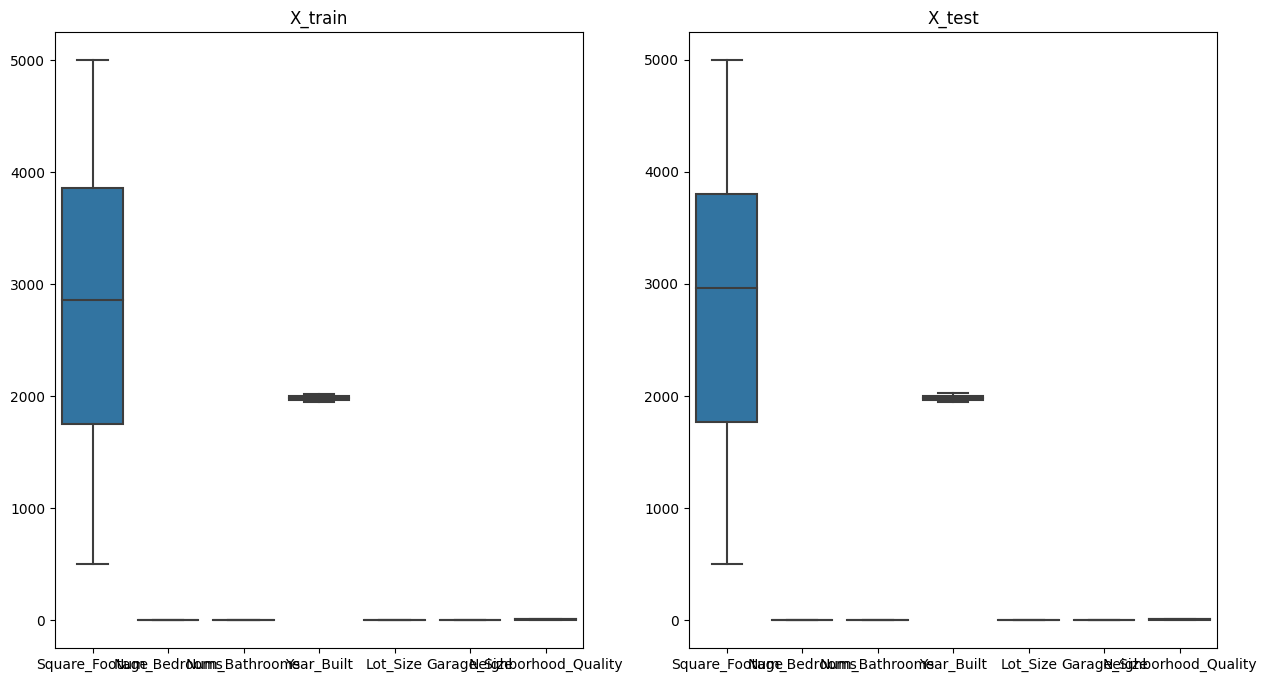

In [29]:
plt.subplots(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(X_test)
plt.title("X_test")
plt.show()


In [31]:
regression=LinearRegression()
lin_model=regression.fit(X_train_scaled,y_train)
y_pred=lin_model.predict(X_test_scaled)
mae=mean_squared_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean_absolute_error :",mae)
print("mean_squared_error :",mse)
print("r2_score :", r2)


mean_absolute_error : 101434798.50563607
mean_squared_error : 101434798.50563607
r2_score : 0.9984263636823413


In [33]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [35]:
ridge=Ridge()
lin_model=ridge.fit(X_train_scaled,y_train)
y_pred=lin_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 8241.58691053321
Mean Squared Error: 102480990.00870793
R2 Score: 0.9984101333060926


In [37]:
lasso=Lasso()
lin_model=lasso.fit(X_train_scaled,y_train)
y_pred=lin_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 8174.748373814534
Mean Squared Error: 101436558.18006405
R2 Score: 0.9984263363831538


In [39]:
elastic_net=ElasticNet()
lin_model=elastic_net.fit(X_train_scaled,y_train)
y_pred=lin_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 75137.53512074286
Mean Squared Error: 7545488911.952415
R2 Score: 0.882941006821446
